'LinUCB' benchmark
=================

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bandpy import run_trials
from bandpy.env import CanonicalLinearBandit
from bandpy.controller import DecentralizedController
from bandpy.agents import LinUCB
from bandpy.utils import check_random_state

Global variables
-----------------------

In [2]:
plt.style.use('tableau-colorblind10')
N_AGENTS = 1  # single agent case only
MAX_RANDINT = 10000
n_trials = 200
max_T = 50
seed = None
n_jobs = 7
verbose = False

Running the experiment
----------------------------------

In [3]:
env = CanonicalLinearBandit(d=2, delta=0.0001,  T=max_T, seed=seed)
controller = DecentralizedController(N=N_AGENTS, agent_cls=LinUCB, agent_kwargs={'arms': env.arms, 'alpha': 0.1})
    
rng = check_random_state(seed)
seeds = rng.randint(MAX_RANDINT, size=n_trials)

trial_results = run_trials(
            env, controller, enable_controller_early_stopping=False,
            seeds=seeds, n_jobs=n_jobs, verbose=verbose)

regrets = []
for trial_result in trial_results:
    _, trial_regret, _ = trial_result
    regrets.append(trial_regret)

Plotting results
----------------------

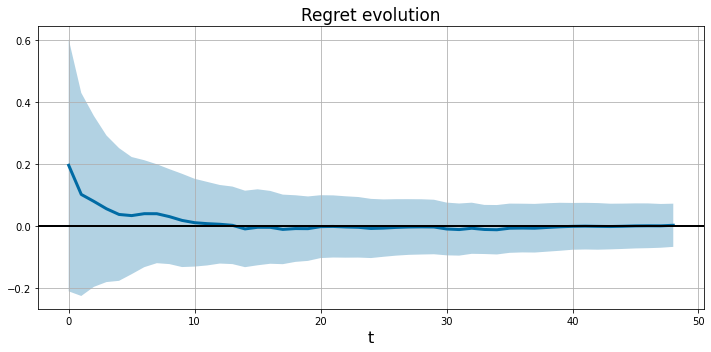

In [4]:
plt.figure(figsize=(10, 5))

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0)
T = len(mean_regrets)

plt.plot(np.arange(T), mean_regrets, lw=3.0)
plt.fill_between(np.arange(T),
                 mean_regrets + std_regrets / 2.0,
                 mean_regrets - std_regrets / 2.0,
                 alpha=0.3)

plt.axhline(lw=2.0, color='black')
plt.xlabel('t', fontsize=16)
plt.grid()
plt.title("Regret evolution", fontsize=17)
plt.tight_layout()
plt.show()